In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from LinearRegressionGD import LinearRegressionGD 
from Linear_Regression import MultipleLinearRegression

In [49]:
df = pd.read_csv("data/Food_Delivery_Times.csv")
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [50]:
df['Traffic_Level'].value_counts()
df['Vehicle_Type'].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

In [51]:
traffic_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
vehicle_mapping = {"Scooter" :1,"Bike":2, "Car":3}
df['Traffic_Level'] = df['Traffic_Level'].map(traffic_mapping)
df['Vehicle_Type'] = df['Vehicle_Type'].map(vehicle_mapping)

In [52]:
df['Traffic_Level'].value_counts()

Traffic_Level
1.0    390
0.0    383
2.0    197
Name: count, dtype: int64

In [53]:
df['Vehicle_Type'].value_counts()


Vehicle_Type
2    503
1    302
3    195
Name: count, dtype: int64

In [54]:
# Feature selection
x = df[['Distance_km', 'Traffic_Level', 'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs']]
y = df['Delivery_Time_min']

# Handle missing values if any
x.fillna(0, inplace=True)
y.fillna(y.mean(), inplace=True)

/tmp/ipykernel_12958/2895523862.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


In [56]:
# Split data into train (800) and test (200)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=200/len(df), random_state=42)

In [58]:
# ==============================
# Train and evaluate Custom Model
# ==============================

my_lr = LinearRegressionGD(learning_rate=0.001, iterations=1000)
my_lr.fit(X_train, y_train)
my_predictions = my_lr.predict(X_test)


In [59]:
# Train Scikit-Learn Model

sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train, y_train)
sklearn_predictions = sklearn_lr.predict(X_test)

In [60]:
# ========================
#      Compute Metrics 
# ========================

def compute_metrics(y_true, y_pred, model_name):
    mae = np.mean(np.abs(y_true - y_pred))  # Mean Absolute Error
    mse = np.mean((y_true - y_pred) ** 2)   # Mean Squared Error
    rmse = np.sqrt(mse)                     # Root Mean Squared Error
    r2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))  # R2 Score
    
    print(f"Metrics for {model_name}:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("="*40)

In [61]:
# Evaluate models
compute_metrics(y_test.values, my_predictions, "Custom Gradient Descent Model")
compute_metrics(y_test.values, sklearn_predictions, "Scikit-Learn Model")

Metrics for Custom Gradient Descent Model:
MAE: 6.876586100964371
MSE: 99.94392956859654
RMSE: 9.997196085332954
R2 Score: 0.7770238402795893
Metrics for Scikit-Learn Model:
MAE: 6.897042225630162
MSE: 94.34619823197735
RMSE: 9.713197116911473
R2 Score: 0.7895124490622695


In [65]:
# Split dataset (800 train, 200 test)
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(x, y, test_size=200/len(df), random_state=42)

In [67]:
# =========================================
# Evaluate OLS (Normal Equation)
# =========================================

my_ols_model = MultipleLinearRegression(X_train_ols, y_train_ols)
my_ols_model.fit()
my_ols_predictions = my_ols_model.predict(X_test_ols)

In [69]:
# =========================================
# Evaluate Scikit-learn OLS
# =========================================
sklearn_ols = LinearRegression()
sklearn_ols.fit(X_train_ols, y_train_ols)
sklearn_predictions = sklearn_ols.predict(X_test_ols)

In [70]:
compute_metrics(y_test_ols.values, my_ols_predictions, "My OLS (Normal Equation)")
compute_metrics(y_test.values, my_predictions, "My GD-based Regression")
compute_metrics(y_test.values, sklearn_predictions, "Scikit-learn Model ")

Metrics for My OLS (Normal Equation):
MAE: 6.897042225630154
MSE: 94.34619823197733
RMSE: 9.713197116911472
R2 Score: 0.7895124490622696
Metrics for My GD-based Regression:
MAE: 6.876586100964371
MSE: 99.94392956859654
RMSE: 9.997196085332954
R2 Score: 0.7770238402795893
Metrics for Scikit-learn Model :
MAE: 6.897042225630162
MSE: 94.34619823197735
RMSE: 9.713197116911473
R2 Score: 0.7895124490622695


Metrics for My OLS (Normal Equation):
MAE: 6.897042225630154
MSE: 94.34619823197733
RMSE: 9.713197116911472
R2 Score: 0.7895124490622696
Metrics for My GD-based Regression:
MAE: 6.876586100964371
MSE: 99.94392956859654
RMSE: 9.997196085332954
R2 Score: 0.7770238402795893
Metrics for Scikit-learn Model:
MAE: 6.897042225630162
MSE: 94.34619823197735
RMSE: 9.713197116911473
R2 Score: 0.7895124490622695


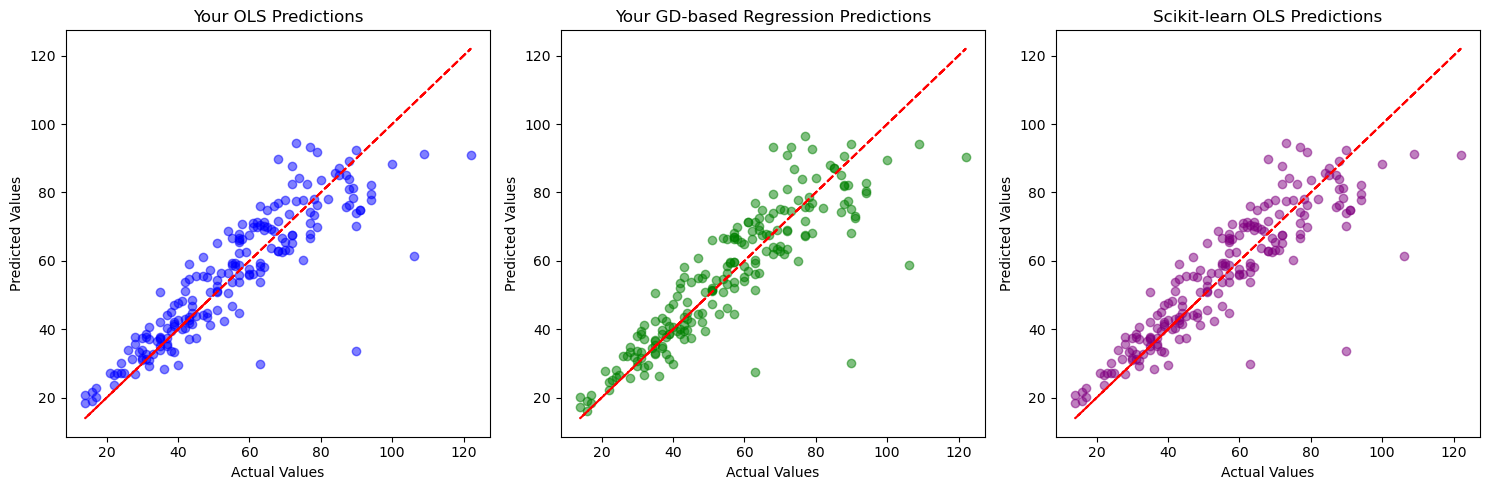

In [71]:
metrics_ols = compute_metrics(y_test.values, my_ols_predictions, "My OLS (Normal Equation)")
metrics_gd = compute_metrics(y_test.values, my_predictions, "My GD-based Regression")
metrics_sklearn = compute_metrics(y_test.values, sklearn_predictions, "Scikit-learn Model")

# =========================================
# Plot Actual vs Predicted Values
# =========================================

plt.figure(figsize=(15, 5))

# Scatter plot: Your OLS
plt.subplot(1, 3, 1)
plt.scatter(y_test_ols, my_ols_predictions, color="blue", alpha=0.5)
plt.plot(y_test, y_test, color="red", linestyle="dashed")  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Your OLS Predictions")

# Scatter plot: Your GD-based Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, my_predictions, color="green", alpha=0.5)
plt.plot(y_test, y_test, color="red", linestyle="dashed")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Your GD-based Regression Predictions")

# Scatter plot: Scikit-learn
plt.subplot(1, 3, 3)
plt.scatter(y_test, sklearn_predictions, color="purple", alpha=0.5)
plt.plot(y_test, y_test, color="red", linestyle="dashed")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scikit-learn OLS Predictions")

plt.tight_layout()
plt.show()

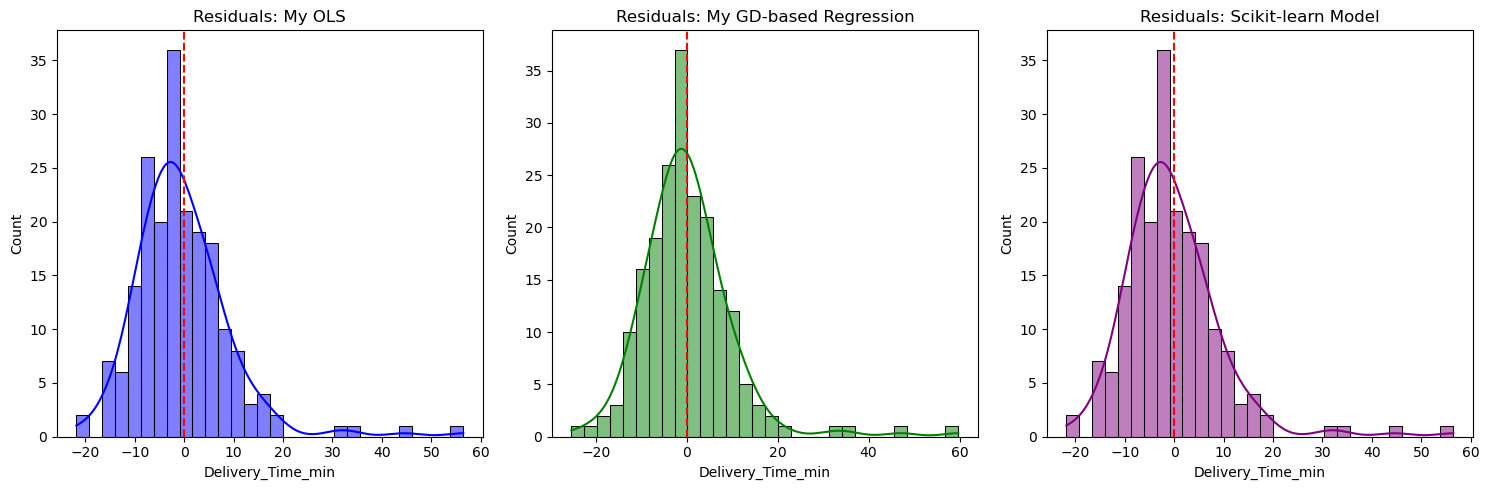

In [ ]:
# =========================================
# Residual Plot (Error Distribution)
# =========================================
plt.figure(figsize=(15, 5))

# Residuals: My OLS
plt.subplot(1, 3, 1)
sns.histplot(y_test_ols - my_ols_predictions, bins=30, kde=True, color="blue")
plt.axvline(0, color="red", linestyle="dashed")
plt.title("Residuals: My OLS")

# Residuals: My GD-based Regression
plt.subplot(1, 3, 2)
sns.histplot(y_test - my_predictions, bins=30, kde=True, color="green")
plt.axvline(0, color="red", linestyle="dashed")
plt.title("Residuals: My GD-based Regression")

# Residuals: Scikit-learn Model
plt.subplot(1, 3, 3)
sns.histplot(y_test - sklearn_predictions, bins=30, kde=True, color="purple")
plt.axvline(0, color="red", linestyle="dashed")
plt.title("Residuals: Scikit-learn Model")

plt.tight_layout()
plt.show()